In [3]:
import sqlite3
import emailer
import info_grabber as grabber
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import selenium.webdriver.support.ui as sui
from bs4 import BeautifulSoup
import requests 
import re
import pandas as pd
import time
import numpy as np
import smtplib, ssl
import email.utils
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import getpass
import base64
import reverse_geocode
%load_ext autoreload
%autoreload 2

# Opening Our Saved Data

In [8]:
df = pd.read_json("bizdatafinal.json").reset_index().drop(["index"], axis=1)

In [10]:
reviews_df = pd.read_json("revs_only_one_per_center.json").reset_index().drop(["index"], axis=1)

In [14]:
all_reviews_df = pd.read_json("reviews_tri.json").reset_index().drop(["index"], axis=1)

In [20]:
all_reviews_df

,business_name,date,elite_status,friend_count,photo_count,review,review_count,star_rating,user_location,user_name
0,Manhattan Prep,2019-02-23,None,4 friends,58 photos,I had an absolutely amazing experience in Vict...,18 reviews,5.0,"Manhattan, NY",Chris M.
1,Manhattan Prep,2019-04-22,None,0 friends,None,Elaine Loh at Manhattan Prep was a terrific te...,1 review,5.0,"Manhattan, New York, NY",Peter S.
2,Manhattan Prep,2018-12-14,None,126 friends,None,Had a great experience with Manhattan Prep. Th...,1 review,5.0,"Westport, CT",Zoe G.
3,Manhattan Prep,2009-03-02,None,0 friends,None,The course was really good and the instructors...,1 review,5.0,"New York, NY",Michael N.
4,Blue Tomato Center For Individual Learning and...,2015-05-26,None,0 friends,None,"First to Review An excellent experience, with ...",12 reviews,5.0,"New York, NY",Native N.
5,SmartSitting,2018-01-13,None,1 friend,None,I can't recommend SmartSitting enough. I am a ...,14 reviews,5.0,"Brooklyn, NY",Ciara M.
6,SmartSitting,2013-08-06,None,522 friends,2 photos,Purchased a Yelp Deal First to Review Smartsit...,49 reviews,5.0,"Los Angeles, CA",Roy S.
7,SmartSitting,2015-08-11,None,0 friends,None,I'm so terribly disappointed with this service...,2 reviews,1.0,"Brooklyn, NY",Lynn V.
8,Scott Powers Studios,2016-11-01,None,567 friends,None,I have been taking acting classes at Scott Pow...,14 reviews,5.0,"Teaneck, NJ",Janna D.
9,Scott Powers Studios,2018-09-21,None,0 friends,None,Updated review Well now that Scott Powers clar...,3 reviews,2.0,"Franklin Square, NY",Steven L.


In [38]:
all_reviews_df.star_rating = all_reviews_df.star_rating.apply(lambda x: x[:3]).astype(float)

In [46]:
means = pd.DataFrame(all_reviews_df.groupby("business_name").apply(lambda x: x.star_rating.mean()))


In [60]:
df.join(means, on=df.name)

,display_phone,id,is_closed,name,phone,price,rating,review_count,url,location_0,...,alias_2,title_2,alias_3,title_3,title_0_code,title_1_code,title_2_code,title_3_code,counts,mean
0,(212) 220-1538,oS0Ww3Nnq-gMlN8C_7zkYw,False,MCAT KING,+12122201538,None,5.0,11,https://www.yelp.com/biz/mcat-king-new-york?ad...,213 W 35th St,...,None,None,None,None,1,1,0,0,2,5.000000
1,(888) 215-6269,KNlRkqWwok9Sohm3Ejzfxw,False,Manhattan Elite Prep,+18882156269,None,4.0,11,https://www.yelp.com/biz/manhattan-elite-prep-...,521 5th Ave,...,testprep,Test Preparation,None,None,1,1,1,0,3,4.200000
2,(877) 345-7737,Aifk60wWQB0SSzL_Po1iNg,False,Prep Expert,+18773457737,None,1.0,1,https://www.yelp.com/biz/prep-expert-darien?ad...,30 Old Kings Hwy S,...,tutoring,Tutoring Centers,None,None,1,1,1,0,3,1.000000
3,(585) 794-3211,WQWQ1arj5ADxpsC9BcF8Jg,False,Labs of Learning,+15857943211,None,5.0,1,https://www.yelp.com/biz/labs-of-learning-spen...,86 S Union St,...,summer_camps,Summer Camps,None,None,1,1,1,0,3,NaN
4,(718) 938-9451,dYuidiLtkNeGrR4xIM7aoQ,False,Khan's Tutorial - Floral Park,+17189389451,None,5.0,1,https://www.yelp.com/biz/khans-tutorial-floral...,258-11 Hillside Ave,...,None,None,None,None,1,1,0,0,2,5.000000
5,(973) 376-4646,YmwZHahtds1hijXaIVhkmw,False,LearningRx - Short Hills,+19733764646,None,5.0,1,https://www.yelp.com/biz/learningrx-short-hill...,150 Main St,...,None,None,None,None,1,0,0,0,1,5.000000
6,(516) 484-6284,Fo58Em1EajY8-PFV4E8JYw,False,Mathnasium,+15164846284,None,5.0,1,https://www.yelp.com/biz/mathnasium-roslyn-hei...,217A Mineola Ave,...,None,None,None,None,1,1,0,0,2,4.795455
7,(732) 357-7001,CjaUWPF2P3pa4hA3u6ZcVA,False,Eye Level Learning Center,+17323577001,None,5.0,1,https://www.yelp.com/biz/eye-level-learning-ce...,3 Stephenville Parkway Plz,...,None,None,None,None,1,0,0,0,1,4.428571
8,,SoJgGUB2DfMGHtZ-4_8Bog,False,Lessons with Linda,,None,1.0,1,https://www.yelp.com/biz/lessons-with-linda-ri...,,...,None,None,None,None,1,0,0,0,1,1.000000
9,(516) 307-8899,86Ou01pDTvWNa97CSNyWoQ,False,Prodigy School of the Arts,+15163078899,None,3.0,6,https://www.yelp.com/biz/prodigy-school-of-the...,490 Uniondale Ave,...,privatetutors,Private Tutors,None,None,0,0,1,0,1,2.833333


In [56]:
means.columns = ["mean"]

In [ ]:
import gensim
import nltk
from nltk.probability import FreqDist
from nltk.util import bigrams, trigrams, ngrams
import matplotlib.pyplot as plt
# nltk.download('averaged_perceptron_tagger')
# nltk.download('treebank')
# nltk.download('gutenberg')
import spacy
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

Find all the unique titles and visually look at the titles that are tutoring related

In [118]:
arr_0_all = df_tri_state1.title_0.unique()
arr_1_all = df_tri_state1.title_1.unique()
arr_2_all = df_tri_state1.title_2.unique()
arr_3_all = df_tri_state1.title_3.unique()
arr_comb_all = np.union1d(arr_0_all.astype(str), arr_1_all.astype(str))
arr_comb_all = np.union1d(arr_2_all.astype(str), arr_comb_all)
arr_comb_all = np.union1d(arr_3_all.astype(str), arr_comb_all)

In [120]:
len(arr_comb_all)

452

In [121]:
# get a list of titles that are related to tutoring
def keywords(arr):
    lst = []
    hot_words = ["Tutor", "Child", "Kids", "Education", "Community", "Cultural", "Camps", 
                 "Preschool", "Clubs", "Prep", "Homework"]
    for item in arr:
        for word in hot_words:
            if word in item:
                lst.append(item)
                break
    return lst

In [122]:
len(keywords(arr_comb_all))

25

In [146]:
# checks if the title is related to tutoring or not

 def title_coding(df, titles):
    df_4 = df.copy()
    count = 0
    keys = keywords(arr_comb_all)
    for title in titles:
        encoding = []
        for item in df_4[title].astype(str):
            flag = False
            for key in keys:
                if key in item:
                    encoding.append(1)
                    flag = True
                    break
            if flag == False:
                encoding.append(0)
            else:
                flag = False
        df_4[f"title_{count}_code"] = encoding
        count += 1
    return df_4           
            

In [147]:
df_tri_state2 = title_coding(df_tri_state1, ["title_0", "title_1", "title_2", "title_3"])

In [148]:
df_tri_state2[["name","title_0_code", "title_0", "title_1_code", "title_1", "title_2_code", "title_2", 
          "title_3_code", "title_3"]]

,name,title_0_code,title_0,title_1_code,title_1,title_2_code,title_2,title_3_code,title_3
0,Learn-Rite Driving School,0,Driving Schools,0,NaN,0,NaN,0,NaN
1,Gold Success Driving School,0,Driving Schools,0,NaN,0,NaN,0,NaN
2,Drive Rite Academy,0,Driving Schools,0,NaN,0,NaN,0,NaN
3,Manhattan Prep,1,Tutoring Centers,1,Test Preparation,1,Private Tutors,0,NaN
4,Blueprint LSAT Preparation,1,Tutoring Centers,1,Test Preparation,0,NaN,0,NaN
5,Bright Kids NYC,1,Tutoring Centers,0,NaN,0,NaN,0,NaN
6,Veritas Prep,1,Tutoring Centers,1,Test Preparation,1,Private Tutors,0,NaN
7,TestMasters,1,Test Preparation,0,NaN,0,NaN,0,NaN
8,TPU GMAT Tutoring Score Guarantee NYC,1,Test Preparation,1,Tutoring Centers,1,Private Tutors,0,NaN
9,LSAT Blog,1,Test Preparation,1,Private Tutors,0,NaN,0,NaN


In [150]:
df_tri_state2["counts"] = df_tri_state2["title_0_code"] + df_tri_state2["title_1_code"] + df_tri_state2["title_2_code"] + df_tri_state2["title_3_code"]




In [151]:
df_tri_state3 = df_tri_state2.copy()[df_tri_state2.counts.values > 0]

In [152]:
df_tri_state3.shape

(5594, 30)

In [153]:
df_tri_state3

,display_phone,id,is_closed,name,phone,price,rating,review_count,url,location_0,...,title_1,alias_2,title_2,alias_3,title_3,title_0_code,title_1_code,title_2_code,title_3_code,counts
3,(212) 721-7400,zv-tJy03CCqZA1OZ05gJCQ,False,Manhattan Prep,+12127217400,NaN,4.5,100,https://www.yelp.com/biz/manhattan-prep-new-yo...,138 West 25th St,...,Test Preparation,privatetutors,Private Tutors,NaN,NaN,1,1,1,0,3
4,(888) 427-7737,mjncjh-zqgzwFLP3wTL8TQ,False,Blueprint LSAT Preparation,+18884277737,NaN,4.5,42,https://www.yelp.com/biz/blueprint-lsat-prepar...,594 Broadway,...,Test Preparation,NaN,NaN,NaN,NaN,1,1,0,0,2
5,(646) 434-1084,6z63xLs8i0a-R1FMrzL-zw,False,Bright Kids NYC,+16464341084,NaN,3.5,34,https://www.yelp.com/biz/bright-kids-nyc-new-y...,225 Broadway,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1
6,(800) 925-7737,tiJtgi0vAQULwzVmJDankg,False,Veritas Prep,+18009257737,NaN,4.5,22,https://www.yelp.com/biz/veritas-prep-new-york...,29 W 17th St,...,Test Preparation,privatetutors,Private Tutors,NaN,NaN,1,1,1,0,3
7,(800) 696-5728,dL6McPbcQXFSOrY5cbMp7Q,False,TestMasters,+18006965728,NaN,5.0,19,https://www.yelp.com/biz/testmasters-new-york?...,109 East 42nd St,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1
8,(646) 653-5027,d7RyP2D8soB6gSZXnrrAvg,False,TPU GMAT Tutoring Score Guarantee NYC,+16466535027,NaN,5.0,17,https://www.yelp.com/biz/tpu-gmat-tutoring-sco...,6 Washington Pl,...,Tutoring Centers,privatetutors,Private Tutors,NaN,NaN,1,1,1,0,3
9,(646) 657-8357,3_dH8gOSbF2CMsh5er3FBg,False,LSAT Blog,+16466578357,NaN,5.0,14,https://www.yelp.com/biz/lsat-blog-new-york-2?...,99 Wall St,...,Private Tutors,NaN,NaN,NaN,NaN,1,1,0,0,2
10,(718) 359-3952,zGOxDwURBJ1edWhKFvtxbg,False,Mega Academy,+17183593952,NaN,2.0,14,https://www.yelp.com/biz/mega-academy-flushing...,13350 41st Ave,...,Test Preparation,NaN,NaN,NaN,NaN,1,1,0,0,2
11,(718) 353-9868,HTNDX9rR0ilEPIbEfTlZaQ,False,Premier Aptitude,+17183539868,NaN,5.0,13,https://www.yelp.com/biz/premier-aptitude-flus...,33-45 Francis Lewis Blvd,...,Tutoring Centers,NaN,NaN,NaN,NaN,1,1,0,0,2
12,(888) 884-5728,xKAU42_Ujs1JU3GS5fcu4Q,False,Binary Solution,+18888845728,NaN,4.0,13,https://www.yelp.com/biz/binary-solution-new-y...,99 Hudson St,...,Test Preparation,NaN,NaN,NaN,NaN,1,1,0,0,2


In [154]:
df_tri_state3.reset_index(inplace=True)
df_tri_state3.drop(["index"], axis=1, inplace=True)
df_tri_state3

,display_phone,id,is_closed,name,phone,price,rating,review_count,url,location_0,...,title_1,alias_2,title_2,alias_3,title_3,title_0_code,title_1_code,title_2_code,title_3_code,counts
0,(212) 721-7400,zv-tJy03CCqZA1OZ05gJCQ,False,Manhattan Prep,+12127217400,NaN,4.5,100,https://www.yelp.com/biz/manhattan-prep-new-yo...,138 West 25th St,...,Test Preparation,privatetutors,Private Tutors,NaN,NaN,1,1,1,0,3
1,(888) 427-7737,mjncjh-zqgzwFLP3wTL8TQ,False,Blueprint LSAT Preparation,+18884277737,NaN,4.5,42,https://www.yelp.com/biz/blueprint-lsat-prepar...,594 Broadway,...,Test Preparation,NaN,NaN,NaN,NaN,1,1,0,0,2
2,(646) 434-1084,6z63xLs8i0a-R1FMrzL-zw,False,Bright Kids NYC,+16464341084,NaN,3.5,34,https://www.yelp.com/biz/bright-kids-nyc-new-y...,225 Broadway,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1
3,(800) 925-7737,tiJtgi0vAQULwzVmJDankg,False,Veritas Prep,+18009257737,NaN,4.5,22,https://www.yelp.com/biz/veritas-prep-new-york...,29 W 17th St,...,Test Preparation,privatetutors,Private Tutors,NaN,NaN,1,1,1,0,3
4,(800) 696-5728,dL6McPbcQXFSOrY5cbMp7Q,False,TestMasters,+18006965728,NaN,5.0,19,https://www.yelp.com/biz/testmasters-new-york?...,109 East 42nd St,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1
5,(646) 653-5027,d7RyP2D8soB6gSZXnrrAvg,False,TPU GMAT Tutoring Score Guarantee NYC,+16466535027,NaN,5.0,17,https://www.yelp.com/biz/tpu-gmat-tutoring-sco...,6 Washington Pl,...,Tutoring Centers,privatetutors,Private Tutors,NaN,NaN,1,1,1,0,3
6,(646) 657-8357,3_dH8gOSbF2CMsh5er3FBg,False,LSAT Blog,+16466578357,NaN,5.0,14,https://www.yelp.com/biz/lsat-blog-new-york-2?...,99 Wall St,...,Private Tutors,NaN,NaN,NaN,NaN,1,1,0,0,2
7,(718) 359-3952,zGOxDwURBJ1edWhKFvtxbg,False,Mega Academy,+17183593952,NaN,2.0,14,https://www.yelp.com/biz/mega-academy-flushing...,13350 41st Ave,...,Test Preparation,NaN,NaN,NaN,NaN,1,1,0,0,2
8,(718) 353-9868,HTNDX9rR0ilEPIbEfTlZaQ,False,Premier Aptitude,+17183539868,NaN,5.0,13,https://www.yelp.com/biz/premier-aptitude-flus...,33-45 Francis Lewis Blvd,...,Tutoring Centers,NaN,NaN,NaN,NaN,1,1,0,0,2
9,(888) 884-5728,xKAU42_Ujs1JU3GS5fcu4Q,False,Binary Solution,+18888845728,NaN,4.0,13,https://www.yelp.com/biz/binary-solution-new-y...,99 Hudson St,...,Test Preparation,NaN,NaN,NaN,NaN,1,1,0,0,2


In [155]:
df_biz_tri = df_tri_state3.drop_duplicates().reset_index().drop(["index"], axis=1)

In [157]:
df_biz_tri.shape

(2128, 30)

In [159]:
df_biz_tri.to_json("bizdata.json")

In [2]:
df_biz_tri = pd.read_json("bizdata.json")

In [5]:
df_biz_tri = df_biz_tri.reset_index()

In [7]:
df_biz_tri.drop(["index"], axis=1, inplace=True)

In [8]:
df_biz_tri

,display_phone,id,is_closed,name,phone,price,rating,review_count,url,location_0,...,title_1,alias_2,title_2,alias_3,title_3,title_0_code,title_1_code,title_2_code,title_3_code,counts
0,(212) 721-7400,zv-tJy03CCqZA1OZ05gJCQ,False,Manhattan Prep,+12127217400,None,4.5,100,https://www.yelp.com/biz/manhattan-prep-new-yo...,138 West 25th St,...,Test Preparation,privatetutors,Private Tutors,None,None,1,1,1,0,3
1,(888) 427-7737,mjncjh-zqgzwFLP3wTL8TQ,False,Blueprint LSAT Preparation,+18884277737,None,4.5,42,https://www.yelp.com/biz/blueprint-lsat-prepar...,594 Broadway,...,Test Preparation,None,None,None,None,1,1,0,0,2
2,(212) 327-0098,z9qXu4bAn1sz39yYGkgp7Q,False,Med School Tutors,+12123270098,None,4.5,13,https://www.yelp.com/biz/med-school-tutors-new...,555 Fifth Ave,...,Test Preparation,None,None,None,None,1,1,0,0,2
3,(914) 921-6700,3kXRRyEYlSmc94PU1in25g,False,Advantage Testing of Westchester,+19149216700,None,2.5,5,https://www.yelp.com/biz/advantage-testing-of-...,350 Theodore Fremd Ave,...,None,None,None,None,None,1,0,0,0,1
4,(201) 553-2200,6nuVvUQ4KoOKqhZLwfjbJA,False,Look What I Can Do Learning Center,+12015532200,None,4.5,15,https://www.yelp.com/biz/look-what-i-can-do-le...,5600 Kennedy Blvd,...,None,None,None,None,None,1,0,0,0,1
5,(718) 278-7500,lFmxYnXS491dJLz2hG4qHA,False,Diki Discovery Center,+17182787500,None,4.0,9,https://www.yelp.com/biz/diki-discovery-center...,30-16 37th St,...,None,None,None,None,None,1,0,0,0,1
6,(917) 720-2865,T8sy9gRqf5-Ec0Wtq4FhCw,False,Choice Parenting,+19177202865,None,5.0,7,https://www.yelp.com/biz/choice-parenting-jers...,,...,Nanny Services,educationservices,Educational Services,None,None,1,0,1,0,2
7,(718) 646-6272,78v1SCBY7gNygpQhK0d1gQ,False,Butterfly Daycare Center,+17186466272,None,3.0,5,https://www.yelp.com/biz/butterfly-daycare-cen...,2770 E 16th St,...,Preschools,None,None,None,None,1,1,0,0,2
8,(201) 795-1443,tURb4XtTr5NtAWb8qtg8EQ,False,St Elizabeth Child Care Center,+12017951443,None,5.0,5,https://www.yelp.com/biz/st-elizabeth-child-ca...,129 Garrison Ave,...,None,None,None,None,None,1,0,0,0,1
9,(646) 206-9183,IjiUHhvzuaEO48nDeRcoRw,False,Doula Support NYC,+16462069183,None,5.0,5,https://www.yelp.com/biz/doula-support-nyc-new...,928 Broadway,...,Yoga,childbirthedu,Childbirth Education,None,None,0,0,1,0,1


We reduced the our data by almost 100 entries

### Getting Review Data From Yelp

In [9]:
def get_specific_data(driver, class_name, att="title", get_info="class"):
    elems = driver.find_elements_by_class_name(class_name)
    final = []
    if get_info == "att":
        for elem in elems:
            info = elem.get_attribute(att)
            final.append(info)
    else:
        for elem in elems:
            info = elem.text
            final.append(info)
    return final

In [10]:
def get_star_ratings(driver):
    page = driver.page_source
    soup = BeautifulSoup(page)
    meta = soup.findAll("meta")
    stars = []
    for item in str(meta).split("<meta content="):
        if "ratingValue" in item:
            try:
                stars.append(float(item.strip(' itemprop="ratingValue"/>, ')))
            except:
                continue
    return stars

In [11]:
def get_certain_data(driver, subj):
    page = driver.page_source
    soup = BeautifulSoup(page)
    meta = soup.findAll("meta")
    data = []
    for item in str(meta).split("<meta content="):
        if subj in item:
            try:
                data.append(item.strip(f' itemprop="{subj}"/>, '))
            except:
                continue
    return data

In [12]:
def get_user_name(driver):
    page = driver.page_source
    soup = BeautifulSoup(page)
    meta = soup.findAll("meta")
    names = []
    for item in str(meta).split("<meta content="):
        if "author" in item:
            try:
                names.append(item.strip(' itemprop="author"/>, '))
            except:
                continue
    return names

In [13]:
def get_reviews(driver): 
#     user_name = get_certain_data(driver, "author")
    user_info = get_specific_data(driver, "user-passport-info")
    user_passport = get_specific_data(driver, "user-passport-stats")
    review_date = get_certain_data(driver, "datePublished")
    user_review = get_specific_data(driver, "review-content")
    user_star = np.array(get_certain_data(driver, "ratingValue")[1:])
#     review_dict = {"UserName": user_name, "Review" : user_review,  "Star" : user_star}
    return user_info, user_passport, review_date, user_review, user_star

In [14]:
def clean_text(lst, regular=False):
    if regular:
        text_lst = [(" ").join(item[item.index("\n")+1:].split("\n")) for item in lst]
    else:
        text_lst = [item.split("\n") for item in lst]
    return text_lst

In [15]:
import time
from tqdm import tqdm


def get_all_reviews(df):
    driver = webdriver.Chrome("/Users/flatironschool/Downloads/chromedriver")
    runs = 0
    size = df.shape[0]
    business_list = []
    for num in tqdm(range(df.url.shape[0])):
        business = {}
        try:
            count = 0
            runs += 1
            link = df.url[num]
            url = link[:link.index("?")]
            driver.get(url) 
            biz_name = df.name[num]
            business[biz_name] = {"User": [], "User_Stat" : [], 
                                      "Rev_Date" :[], "User_Rev" : [], 
                                      "Star_Rating" : []}
            try:
                pages = int(get_specific_data(driver, "page-of-pages")[0][-1])
                while count <= pages*20:
                        driver.get(url+f"?start={count}") 
                        uname, upass, ud, urevs, us = get_reviews(driver)
                        ur = clean_text(urevs, regular=True)
                        un = clean_text(uname)
                        up = clean_text(upass)
                        business[biz_name]["User"].extend(un)
                        business[biz_name]["User_Stat"].extend(up)
                        business[biz_name]["Rev_Date"].extend(ud)
                        business[biz_name]["Star_Rating"].extend(us)
                        business[biz_name]["User_Rev"].extend(ur)
                        count += 20
                if runs % 100 == 0:
                    pd.DataFrame(business).to_json("business_reviews_4.json")
                elif runs in [int(size/2), int(size/4), int((3*size)/4)]:
                    emailer.send_email("Still Running", f"Still Going: {(float(runs)/float(size))*100}% through.") 
                time.sleep(1)
            except Exception as e:
                emailer.send_email("Error 1!", str(e) + f" Error for {biz_name} at {runs} runs.")
                continue
            
        except Exception as e:
            pd.DataFrame(business).to_json("business_reviews_4.json")
            emailer.send_email("Error 2!", e)
            return business_list
        business_list.append(business)
            
    emailer.send_email("Done!", "Done")           
    driver.close()
#     return user_names, user_stats, user_dates, user_reviews, user_stars
    return business_list

In [16]:
def create_clean(biz_rev):
    cols = ["business_name", "user_name", "user_location","date", "review", "star_rating", "user_stats"]
    stats_col_name = ["friend_count", "review_count", "photo_count", "elite_status"]
    keys = list(biz_rev.keys())
    vals = list(biz_rev.values())
    data = []
    for i in range(len(vals)):
        for j in range(len(vals[i]["User"])):
            if len(vals[i]["User"][j]) > 1:
                data.append([keys[i], vals[i]["User"][j][0],  vals[i]["User"][j][1], vals[i]["Rev_Date"][j][:10], 
                         vals[i]["User_Rev"][j], vals[i]["Star_Rating"][j], vals[i]["User_Stat"][j]])
            else:
                data.append([keys[i], vals[i]["User"][j][0],  np.nan, vals[i]["Rev_Date"][j][:10], 
                         vals[i]["User_Rev"][j], vals[i]["Star_Rating"][j], vals[i]["User_Stat"][j]])
    user_df_test = pd.DataFrame(data, columns=cols)
    user_df_test = collapse_feature(user_df_test, ["user_stats"]) 
    user_df_test.rename(columns= dict(zip([f"user_stats_{i}" for i in range(4)], stats_col_name)), inplace=True) 
    return user_df_test


In [1717]:
final_test.to_json("reviews_tri.json")

In [165]:
df_test = pd.read_json("reviews_tri.json")

In [233]:
review_df

,business_name,date,elite_status,friend_count,photo_count,review,review_count,star_rating,user_location,user_name
0,Manhattan Prep,2019-02-23,NaN,4 friends,58 photos,I had an absolutely amazing experience in Vict...,18 reviews,5.0,"Manhattan, NY",Chris M.
1,Manhattan Prep,2019-04-29,NaN,0 friends,7 photos,"520 to 690 (44Q, 41V, 6 IR, 6.0 AWA) after wor...",4 reviews,5.0,"Williamston, SC",Cecil B.
2,Manhattan Prep,2019-04-03,NaN,215 friends,NaN,The Manhattan Prep course was extremely useful...,5 reviews,5.0,"San Francisco, CA",Sean H.
3,Manhattan Prep,2018-12-29,NaN,0 friends,NaN,I took both the in-person course and the Advan...,4 reviews,5.0,"Durham, NC",Abby L.
4,Manhattan Prep,2017-12-04,Elite ’19,328 friends,1316 photos,"2 check-ins If I could give more stars, I woul...",236 reviews,5.0,"San Francisco, CA",Lillian T.
5,Manhattan Prep,2018-06-20,NaN,0 friends,NaN,"On my first GMAT practice test, I scored a 600...",1 review,4.0,"Brooklyn, NY",Jenn B.
6,Manhattan Prep,2018-07-17,NaN,0 friends,NaN,I used Manhattan GMAT and Reed Arnold for my G...,3 reviews,5.0,"New York, NY",Jeff G.
7,Manhattan Prep,2019-01-04,NaN,0 friends,NaN,I really appreciate Dan Bernstein's help! He m...,2 reviews,5.0,"Novi, MI",Li C.
8,Manhattan Prep,2018-07-31,NaN,1 friend,8 photos,I was really optimistic about Manhattan Prep w...,45 reviews,3.0,"Manhattan, NY",Rose B.
9,Manhattan Prep,2019-01-04,NaN,0 friends,NaN,Victoria Crutchfield is amazing! She is as goo...,6 reviews,5.0,"Manhattan, NY",Robert B.


In [234]:
reviews_only_df = review_df[["business_name", "review"]]

In [98]:
reviews_only_df

NameError: name 'reviews_only_df' is not defined

In [276]:
reviews_only_df.to_json("test_review_df1.json")

In [1612]:
import sqlite3
connection = sqlite3.connect('reviews.db')
cursor = connection.cursor()
final_test.to_sql('reviews', connection)

In [1615]:
connection = sqlite3.connect('reviews.db')
cursor = connection.cursor()

In [1700]:
cursor = connection.cursor()

In [237]:
review_df["friend_count"] = review_df.friend_count.str.strip("friends").astype(int)

In [238]:
review_df["review_count"] = review_df.review_count.str.strip("reviews").astype(int)

In [239]:
review_df["photo_count"] = review_df.photo_count.str.strip("photos")

In [241]:
review_df["photo_count"] = review_df.photo_count.fillna(0)

In [97]:
review_df

NameError: name 'review_df' is not defined

In [249]:
final_test = review_df.copy()

In [250]:
# fix_these = final_test[final_test.photo_count.str.contains("Elite") == True]
for _, row in final_test.iterrows():
    if type(row.photo_count) == str and "Elite" in row.photo_count:
        row.elite_status = row.photo_count
        row.photo_count = 0
        




In [252]:
final_test.to_json("finalish_reviews.json")

In [ ]:
cursor.execute('''
    SELECT * FROM table reviews reviewGROUPBY business_name;''')

In [808]:
cursor.execute('''
    CREATE table reviews (
        id INTEGER PRIMARY KEY,
        user_name TEXT,
        date TEXT,
        reviews TEXT,
        stars INTEGER
    );''')

In [809]:
cursor.close()

In [42]:
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk

In [43]:
import spacy
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [1384]:
count_vectorizer = CountVectorizer()

In [1393]:
test_df.index = test_df.business_name

In [1397]:
test_df.index = range(len(test_df))

In [1651]:
test_df.iloc[33]

business_name                                       Manhattan Prep
date                                                    2012-04-25
elite_status                                                   NaN
friend_count                                            99 friends
photo_count                                              Elite ’19
review           It has been my experience that there are very ...
review_count                                           529 reviews
star_rating                                                    5.0
user_location                                        Manhattan, NY
user_name                                                Bryant R.
Name: 33, dtype: object

In [1402]:
mini_corp = {"target":test_df.star_rating.to_list(), "data" :test_df.review.to_list()}

In [1405]:
x_train_counts = count_vectorizer.fit_transform(mini_corp["data"])

In [1414]:
count_vectorizer.vocabulary_.get('recommend')

2768

In [1415]:
tf_transformer = TfidfTransformer(use_idf=False).fit(x_train_counts)
x_train_tf = tf_transformer.transform(x_train_counts)

In [1404]:
rdf = reviews_only_df.review.apply(word_tokenize)

In [1417]:
clf = MultinomialNB()
clf.fit(x_train_tf, mini_corp["target"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [1418]:
text_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])

In [1420]:
text_clf.fit(mini_corp["data"], mini_corp["target"])

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
 ...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [17]:
def automatic_save(item, file, counter, max_count=100, send_email=False):
    if counter % max_count == 0:
        if send_email:
            emailer.send_email("saved!", "everything is good!")
        try:
            pd.DataFrame(item).to_json(f'{file}.json')
        except:
             emailer.send_email("Error!", "file was unabled to be saved!")
        finally:
            print(counter)

In [18]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [19]:
def get_website(df):
    driver = webdriver.Chrome("/Users/flatironschool/Downloads/chromedriver")
    lst = []
    for idx, row in tqdm(df.iterrows(), total=df.shape[0]):
        idx+=1
        driver.get(row.url)
        lst.append({row.name: get_specific_data(driver, "biz-website")})
        time.sleep(1)
        automatic_save(lst, "website_test", idx)
        automatic_save(lst, "website_test", idx, max_count=550, send_email=True)
    driver.close()
    return lst
        
def get_hours(df):
    driver = webdriver.Chrome("/Users/flatironschool/Downloads/chromedriver")
    lst = []
    for idx, row in tqdm(df.iterrows(), total=df.shape[0]):
        idx+=1
        driver.get(row.url)
        lst.append({row.name: get_specific_data(driver, "hours-table")})
        automatic_save(lst, "hours_test", idx)
        automatic_save(lst, "hours_test", idx, max_count=550, send_email=True)
        time.sleep(1)
    driver.close()
    return lst
        

In [ ]:
save_websites = get_website(df_biz_tri)

100
200
300
400
500


In [99]:
df_biz_tri

,display_phone,id,is_closed,name,phone,price,rating,review_count,url,location_0,...,title_1,alias_2,title_2,alias_3,title_3,title_0_code,title_1_code,title_2_code,title_3_code,counts
0,(212) 721-7400,zv-tJy03CCqZA1OZ05gJCQ,False,Manhattan Prep,+12127217400,None,4.5,100,https://www.yelp.com/biz/manhattan-prep-new-yo...,138 West 25th St,...,Test Preparation,privatetutors,Private Tutors,None,None,1,1,1,0,3
1,(888) 427-7737,mjncjh-zqgzwFLP3wTL8TQ,False,Blueprint LSAT Preparation,+18884277737,None,4.5,42,https://www.yelp.com/biz/blueprint-lsat-prepar...,594 Broadway,...,Test Preparation,None,None,None,None,1,1,0,0,2
2,(212) 327-0098,z9qXu4bAn1sz39yYGkgp7Q,False,Med School Tutors,+12123270098,None,4.5,13,https://www.yelp.com/biz/med-school-tutors-new...,555 Fifth Ave,...,Test Preparation,None,None,None,None,1,1,0,0,2
3,(914) 921-6700,3kXRRyEYlSmc94PU1in25g,False,Advantage Testing of Westchester,+19149216700,None,2.5,5,https://www.yelp.com/biz/advantage-testing-of-...,350 Theodore Fremd Ave,...,None,None,None,None,None,1,0,0,0,1
4,(201) 553-2200,6nuVvUQ4KoOKqhZLwfjbJA,False,Look What I Can Do Learning Center,+12015532200,None,4.5,15,https://www.yelp.com/biz/look-what-i-can-do-le...,5600 Kennedy Blvd,...,None,None,None,None,None,1,0,0,0,1
5,(718) 278-7500,lFmxYnXS491dJLz2hG4qHA,False,Diki Discovery Center,+17182787500,None,4.0,9,https://www.yelp.com/biz/diki-discovery-center...,30-16 37th St,...,None,None,None,None,None,1,0,0,0,1
6,(917) 720-2865,T8sy9gRqf5-Ec0Wtq4FhCw,False,Choice Parenting,+19177202865,None,5.0,7,https://www.yelp.com/biz/choice-parenting-jers...,,...,Nanny Services,educationservices,Educational Services,None,None,1,0,1,0,2
7,(718) 646-6272,78v1SCBY7gNygpQhK0d1gQ,False,Butterfly Daycare Center,+17186466272,None,3.0,5,https://www.yelp.com/biz/butterfly-daycare-cen...,2770 E 16th St,...,Preschools,None,None,None,None,1,1,0,0,2
8,(201) 795-1443,tURb4XtTr5NtAWb8qtg8EQ,False,St Elizabeth Child Care Center,+12017951443,None,5.0,5,https://www.yelp.com/biz/st-elizabeth-child-ca...,129 Garrison Ave,...,None,None,None,None,None,1,0,0,0,1
9,(646) 206-9183,IjiUHhvzuaEO48nDeRcoRw,False,Doula Support NYC,+16462069183,None,5.0,5,https://www.yelp.com/biz/doula-support-nyc-new...,928 Broadway,...,Yoga,childbirthedu,Childbirth Education,None,None,0,0,1,0,1


In [20]:
save_hours = get_hours(df_biz_tri)

NoSuchWindowException: Message: no such window: window was already closed
  (Session info: chrome=74.0.3729.108)
  (Driver info: chromedriver=74.0.3729.6 (255758eccf3d244491b8a1317aa76e1ce10d57e9-refs/branch-heads/3729@{#29}),platform=Mac OS X 10.13.6 x86_64)


In [2191]:
pd.DataFrame(save_hours).to_json("hours.json")

In [2198]:
save_hours

[{'Manhattan Prep': []},
 {'180 Degrees LSAT': []},
 {'Bright Kids NYC': []},
 {'Veritas Prep': []},
 {'Premier Aptitude': []},
 {'Talent Prep': []},
 {'MyGuru': []},
 {'Project Management Academy': []},
 {'Kweller Prep': []},
 {'Bee Tutored': []},
 {'Learning Lab': []},
 {'The Study Shack': []},
 {'FasTracKids / Eye Level Learning Center': []},
 {'iKlass Tutoring': []},
 {'Bricks Tutoring': []},
 {'Mathnasium of Bayside': []},
 {'Idea Tutors': []},
 {'PYE Education Center': []},
 {'Academics West': []},
 {'Scholarskills': []},
 {'Better Edge Tutoring': []},
 {'The Brooklyn Math Tutors': []},
 {'Insight Tutoring Center': []},
 {'First Step Coding': []},
 {'SK Academy': []},
 {'Cambridge Coaching': []},
 {'Mini Ivy': []},
 {'Antoine Education': []},
 {'Precision Academic Tutoring': []},
 {'Lifesaver Tutoring': []},
 {'Club Z! In-Home Tutoring Services': []},
 {'Mathnasium': []},
 {'Joys In Teaching Tutoring Service': []},
 {'Sylvan Learning of Bronx': []},
 {'Allen Mentoring': []},
 {'N

In [2196]:
hours_df  = pd.DataFrame([[list(hours.keys())[0] for hours in save_hours], [str(list(hours.values())) for hours in save_hours]]).T


In [1777]:
website_df = pd.DataFrame()
for site in save_websites:
    website_df = pd.concat([website_df, pd.DataFrame(site.keys())], axis=0,sort=True)
   

In [1824]:
website_df  = pd.DataFrame([[list(site.keys())[0] for site in save_websites], [str(list(site.values())[0]) for site in save_websites]]).T



In [1825]:
website_df.columns = ["business_name", "website"]

In [1826]:
website_df.website = website_df.website.str.strip("[]")

In [1802]:
website_df.to_json("websites.json")

In [278]:
len(biz_rev_lst)

2128

In [277]:
rev_lst = []
for ele in biz_rev_lst:
    for key, val in ele.items():
        rev_lst.append({key: np.array(val["User_Rev"]).flatten()})

In [279]:
len(df_biz_tri)

2128

In [280]:
rev_only_one_df = pd.DataFrame([[list(rev.keys())[0] for rev in rev_lst], 
                                              [str(list(rev.values())[0]) for rev in rev_lst]]).T




In [2033]:
rev_lst.append({"Bambini After School" : [""]})
rev_lst.append({"Gifted & Talented Institute" : [""]})

In [282]:
rev_only_one_df.columns = ["business_name", "all_review"]

In [283]:
rev_only_one_df.to_json("revs_only_one_per_center.json")

In [1897]:
for i in range(len(rev_only_one_df.business_name.tolist())):
    if df_biz_tri2.name.tolist()[i] not in rev_only_one_df.business_name.tolist():
        print(i,  df_biz_tri2.name.tolist()[i])
        break

485 Gifted & Talented Institute


In [1893]:
"Bambini After School" in rev_only_one_df.business_name.tolist()

False

In [1941]:
!pip install gensim 

    100% |████████████████████████████████| 24.7MB 912kB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 16.4MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 16.7MB/s ta 0:00:01
    100% |████████████████████████████████| 5.4MB 4.5MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 15.5MB/s ta 0:00:01
  Stored in directory: /Users/flatironschool/Library/Caches/pip/wheels/b8/cb/43/c0ba52baf2b0e371ec1d5b2d4685d6d24617b1391f3eeacda5
Successfully built smart-open


In [154]:
!pip install pyLDAvis

    100% |████████████████████████████████| 1.6MB 1.9MB/s ta 0:00:01
  Stored in directory: /Users/flatironschool/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [155]:
import gensim
import nltk
from nltk.probability import FreqDist
from nltk.util import bigrams, trigrams, ngrams
import matplotlib.pyplot as plt
# nltk.download('averaged_perceptron_tagger')
# nltk.download('treebank')
# nltk.download('gutenberg')
import spacy
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

In [23]:
import re

In [156]:
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [216]:
stop_words = set(stopwords.words('english'))

In [472]:
len(stop_words)

180

In [222]:
lst = iter(["i", "i", "i", "in", "y", "y"])
# lst = remove_stop_words(lst)

In [33]:
reviews_only = pd.read_json("revs_only_one_per_center.json")

In [294]:
rev_only_one_df = reviews_only.reset_index().drop(["index"], axis=1)

In [295]:
# |[\s]{2,}
pattern = r'([\.\,\'\\(\)\"\-\!\%\\\``]|[{.*}?\n]|)'
rev_only_one_df["clean_all_review"] = rev_only_one_df.all_review.apply(lambda x: re.sub(pattern, "", x))

In [296]:
pattern2 = r'[\s]{2,}'
rev_only_one_df["clean_all_review"] = rev_only_one_df.clean_all_review.apply(lambda x: re.sub(pattern2, " ", x))

In [297]:
rev_only_one_df["clean_all_review"] = rev_only_one_df["clean_all_review"].str.lower().str.strip("[]")
rev_only_one_df["tokenized"] = rev_only_one_df["clean_all_review"].apply(nltk.word_tokenize)

In [298]:
rev_only_one_df["no_stop"] = rev_only_one_df["tokenized"].apply(remove_stop_words)

In [299]:
text = rev_only_one_df["no_stop"].tolist()

In [300]:
rev_only_one_df[["no_stop", "clean_all_review"]]

,no_stop,clean_all_review
0,"[absolutely, amazing, experience, victoria, cr...",i had an absolutely amazing experience in vict...
1,"[never, write, reviews, course, excellent, das...",i never write reviews but this course is excel...
2,"[id, spent, months, trying, study, step, 1, nb...",id spent a few months trying to study for step...
3,"[two, kids, advantage, sat/act, prep, first, o...",i have now had two of my kids at advantage for...
4,"[beyond, happy, found, learning, learning, cen...",i am beyond happy i found learning what i can ...
5,"[love, daycare, tried, previous, daycare, son,...",i love this daycare i had tried a previous day...
6,"[holly, helped, family, search, fulltime, nann...",holly helped my family in our search for a ful...
7,"[sons, attended, butterfly, daycare, 2, 5, yea...",both of my sons have attended butterfly daycar...
8,"[school, amazing, son, enrolled, going, two, y...",this school is amazing my son has been enrolle...
9,"[stephanie, wonderful, pregnancy, support, sta...",stephanie is a wonderful pregnancy support i s...


In [324]:
bigrams = gensim.models.Phrases(text)

In [325]:
rev_only_one_df["bigrams"] = rev_only_one_df.no_stop.apply(lambda x: bigrams[x])

In [326]:
dictionary = Dictionary(rev_only_one_df["bigrams"].tolist())
rev_only_one_df["corpus"] = rev_only_one_df["bigrams"].apply(lambda sent: dictionary.doc2bow(sent))

In [327]:
rev_only_one_df["corpus"]

0       [(0, 1), (1, 9), (2, 4), (3, 1), (4, 1), (5, 1...
1       [(1, 2), (10, 2), (11, 4), (12, 1), (22, 3), (...
2       [(6, 2), (10, 5), (29, 1), (41, 3), (102, 1), ...
3       [(148, 1), (152, 1), (184, 1), (204, 1), (222,...
4       [(6, 1), (12, 1), (29, 1), (41, 1), (63, 3), (...
5       [(10, 1), (41, 1), (63, 1), (64, 2), (77, 1), ...
6       [(10, 1), (41, 1), (142, 1), (144, 1), (147, 1...
7       [(10, 1), (41, 1), (49, 1), (57, 1), (102, 1),...
8       [(8, 1), (77, 1), (92, 1), (95, 1), (142, 1), ...
9       [(41, 2), (92, 1), (193, 1), (217, 1), (229, 1...
10      [(41, 2), (92, 1), (186, 1), (196, 1), (226, 1...
11      [(6, 2), (7, 1), (51, 1), (90, 1), (144, 1), (...
12      [(148, 1), (157, 1), (226, 3), (245, 1), (302,...
13      [(52, 1), (101, 1), (142, 2), (246, 1), (259, ...
14      [(41, 2), (130, 1), (179, 1), (226, 1), (229, ...
15      [(12, 1), (289, 1), (294, 1), (328, 1), (459, ...
16      [(57, 1), (362, 1), (867, 2), (963, 1), (976, ...
17      [(976,

In [328]:
lsimodel = LsiModel(corpus=rev_only_one_df["corpus"].tolist(), num_topics=10, id2word=dictionary)

In [329]:
lsimodel.show_topics()

[(0,
  '0.260*"place" + 0.245*"kids" + 0.220*"great" + 0.209*"time" + 0.178*"one" + 0.178*"get" + 0.156*"class" + 0.153*"really" + 0.148*"would" + 0.139*"like"'),
 (1,
  '0.480*"kids" + -0.404*"class" + 0.363*"place" + -0.169*"classes" + 0.153*"party" + -0.136*"course" + 0.107*"staff" + 0.106*"play" + -0.103*"birth" + 0.096*"fun"'),
 (2,
  '-0.441*"school" + -0.255*"teachers" + -0.254*"son" + 0.222*"people" + -0.211*"kids" + -0.206*"child" + -0.189*"daughter" + -0.161*"children" + 0.147*"gym" + -0.139*"class"'),
 (3,
  '0.526*"class" + -0.281*"school" + 0.221*"classes" + 0.213*"place" + 0.191*"kids" + -0.125*"museum" + -0.123*"people" + 0.121*"birth" + -0.114*"teachers" + 0.111*"party"'),
 (4,
  '0.474*"museum" + -0.268*"gym" + 0.248*"exhibit" + 0.175*"exhibits" + 0.163*"birth" + 0.161*"history" + -0.152*"pool" + -0.147*"people" + 0.131*"new_york" + -0.119*"room"'),
 (5,
  '0.308*"museum" + 0.209*"school" + -0.203*"birth" + -0.183*"us" + 0.175*"exhibit" + 0.168*"class" + 0.167*"gym" + 

In [452]:
[] + [1,2]

[1, 2]

In [318]:
hdpmodel = HdpModel(corpus=[rev_only_one_df["corpus"][0]], id2word=dictionary)

In [319]:
hdpmodel.show_topics()

[(0,
  '0.021*class + 0.012*course + 0.012*gmat + 0.008*manhattan_gmat + 0.008*great + 0.007*really + 0.007*test + 0.007*took + 0.007*score + 0.007*get + 0.006*time + 0.006*manhattan_prep + 0.005*instructor + 0.005*take + 0.005*well + 0.004*online + 0.004*work + 0.004*questions + 0.004*instructors + 0.004*help'),
 (1,
  '0.002*questions + 0.002*depressed + 0.001*erickson + 0.001*help + 0.001*fun_engaging + 0.001*picking + 0.001*without_doubt + 0.001*show + 0.001*hire + 0.001*mgmats + 0.001*five_months + 0.001*phone_calls + 0.001*receive + 0.001*advise + 0.001*could_tell + 0.001*pound + 0.001*seriously + 0.001*talking + 0.001*plan + 0.001*promptly'),
 (2,
  '0.002*tend + 0.002*reputation + 0.002*negative + 0.002*decided + 0.002*finished_course + 0.002*applicant + 0.001*whatever + 0.001*addition + 0.001*thin + 0.001*friendly + 0.001*comfort + 0.001*stepbystep + 0.001*positive_encouraging + 0.001*kept + 0.001*answer_question + 0.001*areas_need + 0.001*subject_matter + 0.001*two_years + 0.

In [330]:
ldamodel = LdaModel(corpus=rev_only_one_df["corpus"].tolist(), num_topics=10, id2word=dictionary)

In [331]:
ldamodel.show_topics()

[(0,
  '0.008*"class" + 0.007*"school" + 0.005*"time" + 0.005*"get" + 0.004*"one" + 0.004*"really" + 0.004*"would" + 0.004*"work" + 0.004*"great" + 0.004*"even"'),
 (1,
  '0.019*"class" + 0.009*"birth" + 0.007*"us" + 0.006*"great" + 0.006*"time" + 0.005*"really" + 0.004*"way" + 0.004*"classes" + 0.004*"labor" + 0.004*"experience"'),
 (2,
  '0.012*"school" + 0.011*"kids" + 0.011*"son" + 0.009*"daughter" + 0.009*"teachers" + 0.009*"daycare" + 0.008*"child" + 0.007*"staff" + 0.007*"great" + 0.007*"time"'),
 (3,
  '0.010*"kids" + 0.008*"place" + 0.006*"time" + 0.005*"great" + 0.005*"class" + 0.005*"school" + 0.005*"really" + 0.005*"child" + 0.005*"children" + 0.005*"one"'),
 (4,
  '0.006*"kids" + 0.006*"great" + 0.006*"place" + 0.005*"class" + 0.005*"get" + 0.005*"really" + 0.005*"like" + 0.004*"time" + 0.004*"school" + 0.004*"one"'),
 (5,
  '0.010*"school" + 0.006*"time" + 0.006*"get" + 0.005*"kids" + 0.005*"one" + 0.005*"like" + 0.004*"great" + 0.004*"really" + 0.004*"class" + 0.004*"tea

In [332]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, rev_only_one_df["corpus"].tolist(), dictionary)

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.035290 -0.003410       1        1  26.523849
2     -0.090305  0.012517       2        1  20.225748
6      0.056956  0.081175       3        1  16.503891
4     -0.001852 -0.015899       4        1  10.133682
7     -0.016621  0.014886       5        1   7.320588
8     -0.032699 -0.004331       6        1   4.943851
0      0.039987  0.013901       7        1   4.291865
1      0.039627 -0.062634       8        1   4.025989
5      0.004064  0.009441       9        1   3.476084
9      0.036133 -0.045646      10        1   2.554442, topic_info=     Category         Freq         Term        Total  loglift  logprob
504   Default  6056.000000        class  6056.000000  30.0000  30.0000
2125  Default  8170.000000       school  8170.000000  29.0000  29.0000
2480  Default  6851.000000         time  6851.000000  28.0000  28.0000
2596  Default  3146.000000           us  3146.000000  27.0000  27.0000
3743  Default  1003.000000        birth  1003.000000  26.0000  26.0000
3780  Default  3701.000000      daycare  3701.000000  25.0000  25.0000
1058  Default  4934.000000          get  4934.000000  24.0000  24.0000
1685  Default  5558.000000          one  5558.000000  23.0000  23.0000
3678  Default  5265.000000        child  5265.000000  22.0000  22.0000
1996  Default  4948.000000       really  4948.000000  21.0000  21.0000
1106  Default  6298.000000        great  6298.000000  20.0000  20.0000
2737  Default  5310.000000        would  5310.000000  19.0000  19.0000
3692  Default  7958.000000         kids  7958.000000  18.0000  18.0000
2411  Default  4930.000000     teachers  4930.000000  17.0000  17.0000
3740  Default  1345.000000         baby  1345.000000  16.0000  16.0000
4059  Default  1205.000000      husband  1205.000000  15.0000  15.0000
664   Default  3655.000000          day  3655.000000  14.0000  14.0000
2721  Default  3504.000000         work  3504.000000  13.0000  13.0000
892   Default  3685.000000   experience  3685.000000  12.0000  12.0000
1149  Default  2666.000000         help  2666.000000  11.0000  11.0000
2277  Default  4064.000000        staff  4064.000000  10.0000  10.0000
506   Default  2463.000000      classes  2463.000000   9.0000   9.0000
2652  Default  2237.000000          way  2237.000000   8.0000   8.0000
3711  Default  5334.000000          son  5334.000000   7.0000   7.0000
973   Default  3138.000000        first  3138.000000   6.0000   6.0000
1423  Default  4501.000000         like  4501.000000   5.0000   5.0000
3682  Default  4880.000000     daughter  4880.000000   4.0000   4.0000
1904  Default  1312.000000      process  1312.000000   3.0000   3.0000
3756  Default  4270.000000     children  4270.000000   2.0000   2.0000
623   Default  1627.000000       course  1627.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
2596  Topic10   149.708176           us  3146.031494   0.6221  -5.2905
943   Topic10    83.527908         feel  1370.849121   0.8693  -5.8740
5339  Topic10    28.483744         pain   195.674667   1.7402  -6.9499
1182  Topic10    88.867310         home  1763.604004   0.6794  -5.8121
2737  Topic10   157.017532        would  5310.860352   0.1462  -5.2428
1007  Topic10    78.942612        found  1539.104370   0.6971  -5.9305
1269  Topic10    54.445354  information   729.971802   1.0715  -6.3020
2480  Topic10   153.782928         time  6851.452637  -0.1293  -5.2637
892   Topic10   109.019775   experience  3685.324951   0.1468  -5.6077
1058  Topic10   121.097183          get  4934.310547  -0.0400  -5.5026
2017  Topic10    69.272972    recommend  1427.223877   0.6419  -6.0611
1149  Topic10    90.263756         help  2666.112061   0.2817  -5.7965
506   Topic10    86.647942      classes  2463.322754   0.3199  -5.8373
973   Topic10    93.290108        first  3138.688721   0.1515  -5.7635
1106  Topic10   121.783585        great  62

In [333]:
!pip install textblob

    100% |████████████████████████████████| 645kB 5.4MB/s eta 0:00:01


In [445]:
import textblob

In [514]:
def analyze_sentiment(review):
    analysis = textblob.TextBlob(review)
    return (analysis.sentiment.polarity)
        

In [369]:
rev_only_one_df["cleaned_nostop_text"] = rev_only_one_df["no_stop"].apply(lambda x: " ".join(x))

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Xtrain, Xtest, Ytrain, Ytest = train_test_split(rev_only_one_df["cleaned_nostop_text"], df_biz_tri["rating"], test_size=.2)

In [407]:
scaler = StandardScaler()

In [402]:
traindf = pd.DataFrame(Xtrain)

In [403]:
traindf["sentiment"] = traindf["cleaned_nostop_text"].apply(analyze_sentiment)

In [427]:
traindf.shape

(1702, 2)

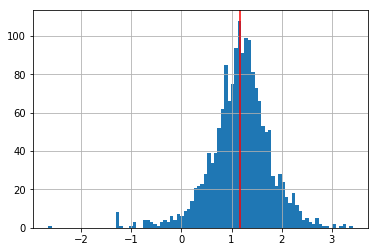

In [432]:
plt.axvline(x=x_bar, label = "Population mean", color="red")
traindf["sentiment"].hist(bins=90)

In [436]:
#close to normally distributes, slightly negatively skewed and Leptokurtic

print("Kurtosis: ", kurtosis(traindf["sentiment"], fisher=False))
print("Skewness: ", skew(traindf["sentiment"]))


Kurtosis:  5.708628515824488
Skewness:  -0.5940056422904847


,display_phone,id,is_closed,name,phone,price,rating,review_count,url,location_0,...,title_1,alias_2,title_2,alias_3,title_3,title_0_code,title_1_code,title_2_code,title_3_code,counts
0,(212) 721-7400,zv-tJy03CCqZA1OZ05gJCQ,False,Manhattan Prep,+12127217400,None,4.5,100,https://www.yelp.com/biz/manhattan-prep-new-yo...,138 West 25th St,...,Test Preparation,privatetutors,Private Tutors,None,None,1,1,1,0,3
1,(888) 427-7737,mjncjh-zqgzwFLP3wTL8TQ,False,Blueprint LSAT Preparation,+18884277737,None,4.5,42,https://www.yelp.com/biz/blueprint-lsat-prepar...,594 Broadway,...,Test Preparation,None,None,None,None,1,1,0,0,2
2,(212) 327-0098,z9qXu4bAn1sz39yYGkgp7Q,False,Med School Tutors,+12123270098,None,4.5,13,https://www.yelp.com/biz/med-school-tutors-new...,555 Fifth Ave,...,Test Preparation,None,None,None,None,1,1,0,0,2
3,(914) 921-6700,3kXRRyEYlSmc94PU1in25g,False,Advantage Testing of Westchester,+19149216700,None,2.5,5,https://www.yelp.com/biz/advantage-testing-of-...,350 Theodore Fremd Ave,...,None,None,None,None,None,1,0,0,0,1
4,(201) 553-2200,6nuVvUQ4KoOKqhZLwfjbJA,False,Look What I Can Do Learning Center,+12015532200,None,4.5,15,https://www.yelp.com/biz/look-what-i-can-do-le...,5600 Kennedy Blvd,...,None,None,None,None,None,1,0,0,0,1
5,(718) 278-7500,lFmxYnXS491dJLz2hG4qHA,False,Diki Discovery Center,+17182787500,None,4.0,9,https://www.yelp.com/biz/diki-discovery-center...,30-16 37th St,...,None,None,None,None,None,1,0,0,0,1
6,(917) 720-2865,T8sy9gRqf5-Ec0Wtq4FhCw,False,Choice Parenting,+19177202865,None,5.0,7,https://www.yelp.com/biz/choice-parenting-jers...,,...,Nanny Services,educationservices,Educational Services,None,None,1,0,1,0,2
7,(718) 646-6272,78v1SCBY7gNygpQhK0d1gQ,False,Butterfly Daycare Center,+17186466272,None,3.0,5,https://www.yelp.com/biz/butterfly-daycare-cen...,2770 E 16th St,...,Preschools,None,None,None,None,1,1,0,0,2
8,(201) 795-1443,tURb4XtTr5NtAWb8qtg8EQ,False,St Elizabeth Child Care Center,+12017951443,None,5.0,5,https://www.yelp.com/biz/st-elizabeth-child-ca...,129 Garrison Ave,...,None,None,None,None,None,1,0,0,0,1
9,(646) 206-9183,IjiUHhvzuaEO48nDeRcoRw,False,Doula Support NYC,+16462069183,None,5.0,5,https://www.yelp.com/biz/doula-support-nyc-new...,928 Broadway,...,Yoga,childbirthedu,Childbirth Education,None,None,0,0,1,0,1


In [425]:
import scipy.stats as stats
from scipy.stats import kurtosis, skew

In [406]:
x_bar = traindf["sentiment"].mean()
std = traindf["sentiment"].std()
print(x_bar, std)

1.1723152085697586 0.6054560865213291


In [415]:
confidence_intervals = stats.t.interval(alpha = .95,                              # Confidence level
                             df= len(traindf)-1,             # Degrees of freedom
                             loc = x_bar,                               # Sample mean
                             scale = std)  

In [374]:
df_biz_tri.iloc[18]

display_phone                                       (201) 804-2777
id                                          RseV4zQIH3GcnMDw1p0B3g
is_closed                                                    False
name                                            Clockwork Learning
phone                                                 +12018042777
price                                                         None
rating                                                           1
review_count                                                     1
url              https://www.yelp.com/biz/clockwork-learning-ly...
location_0                                        800 Schuyler Ave
location_1                                                    None
location_2                                                    None
location_3                                               Lyndhurst
location_4                                                   07071
location_5                                                    

In [375]:
rev_only_one_df.iloc[18]

business_name                                         Clockwork Learning
all_review             ['First to Review Do NOT trust any of the chil...
clean_all_review       first to review do not trust any of the child ...
tokenized              [first, to, review, do, not, trust, any, of, t...
no_stop                [first, review, trust, child, care, centers, a...
bigrams                [first_review, trust, child_care, centers, aff...
corpus                 [(152, 1), (182, 1), (184, 1), (336, 1), (447,...
cleaned_nostop_text    first review trust child care centers affiliat...
sentiment                                                      -0.905449
Name: 18, dtype: object

In [207]:
rev_only_one_df["bigrams"][0]

['needed',
 'find',
 'daycare',
 'short_notice',
 'given',
 'mrs',
 'karines',
 'informationwe',
 'met',
 'kind',
 'informative',
 'felt_ease',
 'llearning',
 'teacher',
 'son',
 'year_old',
 'nervous',
 'naturally',
 'baby',
 'cried',
 'first',
 'day',
 'quickly',
 'changed',
 'few_days',
 'ny',
 'son',
 'half',
 'would',
 'get',
 'super_excited',
 'get',
 'dropped',
 'would',
 'run',
 'car',
 'mrs',
 'karines',
 'arms',
 'took',
 'great',
 'care',
 'various_activities',
 'other',
 'children',
 'son',
 'learned_lot',
 'took',
 'time',
 'read_books',
 'attentive',
 'sweet',
 'parents',
 'children',
 'ton',
 'books_toys',
 'home',
 'very_nice',
 'tidy',
 'pricing_reasonable',
 'easy',
 'work',
 'unfortunately',
 'move',
 'visit',
 'son',
 'became',
 'attached',
 'see',
 'like',
 'family',
 'truly',
 'loving',
 'amazing',
 'would_recommend',
 'anyone_whos',
 'looking',
 'leave',
 'child',
 'good_hands',
 'first_review',
 'wish_could',
 'give',
 'establishment',
 'stars',
 'kathrine',
 'g

In [64]:
user_unique = rev_only_one_df["tokenized"].apply(nltk.FreqDist)

In [66]:
word_freq_df = user_unique.apply(pd.Series)

In [68]:
word_freq_df.fillna(0, inplace=True)

In [70]:
word_freq_df.to_json("frequency.json")

In [86]:
rev_only_one_df["word_set"] = rev_only_one_df["tokenized"].apply(set)

In [89]:
rev_only_one_df["unique_word_count"] = rev_only_one_df["word_set"].apply(len)

In [93]:
rev_only_one_df["unique_word_%"] = (rev_only_one_df["unique_word_count"] / rev_only_one_df["word_count"]) * 100

In [95]:
rev_only_one_df["total_reviews"] = df_biz_tri.review_count

In [106]:
reviews_df = pd.read_json("finalish_reviews.json")

In [107]:
reviews_df = reviews_df.reset_index().drop(["index"], axis=1)

In [116]:
reviews_df = reviews_df.sort_values("business_name").reset_index().drop(["index"], axis=1)

In [128]:
grouped_rev_df = reviews_df.groupby("business_name").apply(lambda x: x.sort_values("review_count"))

In [140]:
grouped_rev_df

business_name       date  \
business_name                                                                   
"Fairy Tale"Family Child Care 0      "Fairy Tale"Family Child Care 2019-01-17   
                              1      "Fairy Tale"Family Child Care 2019-01-18   
123 Kinderstar Day School     2          123 Kinderstar Day School 2012-09-02   
180 Degrees LSAT              52                  180 Degrees LSAT 2012-03-28   
                              14                  180 Degrees LSAT 2014-01-04   
                              45                  180 Degrees LSAT 2016-12-29   
                              9                   180 Degrees LSAT 2018-08-31   
                              42                  180 Degrees LSAT 2015-08-09   
                              6                   180 Degrees LSAT 2019-02-07   
                              50                  180 Degrees LSAT 2013-09-19   
                              33                  180 Degrees LSAT 2015-03-29   
                              28                  180 Degrees LSAT 2017-03-13   
                              17                  180 Degrees LSAT 2013-10-09   
                              49                  180 Degrees LSAT 2015-04-27   
                              47                  180 Degrees LSAT 2017-03-07   
                              48                  180 Degrees LSAT 2016-03-02   
                              21                  180 Degrees LSAT 2014-07-14   
                              30                  180 Degrees LSAT 2016-07-13   
                              26                  180 Degrees LSAT 2017-03-25   
                              31                  180 Degrees LSAT 2013-07-14   
                              51                  180 Degrees LSAT 2016-07-05   
                              3                   180 Degrees LSAT 2013-01-30   
                              27                  180 Degrees LSAT 2017-02-07   
                              10                  180 Degrees LSAT 2018-02-28   
                              12                  180 Degrees LSAT 2018-06-16   
                              8                   180 Degrees LSAT 2012-04-03   
                              20                  180 Degrees LSAT 2012-04-02   
                              34                  180 Degrees LSAT 2013-08-01   
                              15                  180 Degrees LSAT 2017-09-07   
                              44                  180 Degrees LSAT 2012-09-11   
...                                                            ...        ...   
mbaMission                    17820                     mbaMission 2015-01-25   
                              17851                     mbaMission 2015-04-08   
                              17821                     mbaMission 2016-03-06   
                              17834                     mbaMission 2011-04-16   
                              17833                     mbaMission 2014-03-07   
                              17836                     mbaMission 2016-03-21   
                              17814                     mbaMission 2013-04-24   
                              17847                     mbaMission 2011-07-27   
                              17822                     mbaMission 2015-03-04   
                              17850                     mbaMission 2011-11-11   
mySTEMtutor                   17853                    mySTEMtutor 2016-04-07   
                              17854                    mySTEMtutor 2015-09-23   
                              17852                    mySTEMtutor 2015-12-28   
reDiscover Center             17865              reDiscover Center 2019-02-18   
                              17867              reDiscover Center 2018-05-27   
                              17857              reDiscover Center 2014-01-28   
                              17855              reDiscover Center 2018-03-11   
   

In [141]:
rev_only_one_df = rev_only_one_df.sort_values("business_name").reset_index().drop(["index"], axis=1)

In [144]:
rev_only_one_df["pos_tag_sent"] = rev_only_one_df["tokenized"].apply(nltk.pos_tag)

In [145]:
rev_only_one_df

,business_name,all_review,clean_all_review,tokenized,word_count,word_set,unique_word_count,unique_word_%,total_reviews,pos_tag_sent
0,"""Fairy Tale""Family Child Care","[""I needed to find a daycare short notice and ...",i needed to find a daycare short notice and wa...,"[i, needed, to, find, a, daycare, short, notic...",398,"{unfortunately, no, establishment, run, natura...",204,51.256281,2,"[(i, NN), (needed, VBD), (to, TO), (find, VB),..."
1,123 Kinderstar Day School,"['First to Review Excellent school, great teac...",first to review excellent school great teacher...,"[first, to, review, excellent, school, great, ...",77,"{than, in, i, creativity, school, kids, picky,...",59,76.623377,1,"[(first, RB), (to, TO), (review, VB), (excelle..."
2,180 Degrees LSAT,"[""Larkin is by far the best LSAT tutor in New ...",larkin is by far the best lsat tutor in new yo...,"[larkin, is, by, far, the, best, lsat, tutor, ...",10057,"{shot, lots, being, books, nervous, offset, he...",1535,15.263001,47,"[(larkin, NN), (is, VBZ), (by, IN), (far, RB),..."
3,180 Degrees LSAT,"[""I am thrilled to report that after working w...",i am thrilled to report that after working wit...,"[i, am, thrilled, to, report, that, after, wor...",756,"{past, no, maybe, category, consultation, have...",310,41.005291,3,"[(i, NN), (am, VBP), (thrilled, VBN), (to, TO)..."
4,1st California Notary Services,['I researched several options to enroll for t...,i researched several options to enroll for the...,"[i, researched, several, options, to, enroll, ...",331,"{no, reached, evenings, have, students, teachi...",168,50.755287,5,"[(i, RB), (researched, VBD), (several, JJ), (o..."
5,383 Design Studio,['Mikelle from 383 Design Studio is an absolut...,mikelle from design studio is an absolute gem ...,"[mikelle, from, design, studio, is, an, absolu...",208,"{because, when, teaching, help, point, private...",125,60.096154,2,"[(mikelle, NN), (from, IN), (design, NN), (stu..."
6,540WMain Communiversity,['I have attended a number of things related t...,i have attended a number of things related to ...,"[i, have, attended, a, number, of, things, rel...",824,"{meal, got, works, back, cheeses, relevant, ra...",417,50.606796,9,"[(i, NNS), (have, VBP), (attended, VBN), (a, D..."
7,7 Fine Arts,['Sheri was so sweet and is an incredible inst...,sheri was so sweet and is an incredible instru...,"[sheri, was, so, sweet, and, is, an, incredibl...",855,"{different, teaches, when, encouraging, making...",359,41.988304,10,"[(sheri, NN), (was, VBD), (so, RB), (sweet, JJ..."
8,800score,"[""First to Review The slick website claims tha...",first to review the slick website claims that ...,"[first, to, review, the, slick, website, claim...",179,"{no, empty, run, students, news, endorse, into...",126,70.391061,1,"[(first, RB), (to, TO), (review, VB), (the, DT..."
9,82nd Street Academics,['Our daughter has been at 82nd St through 2 y...,our daughter has been at nd st through yrs of ...,"[our, daughter, has, been, at, nd, st, through...",1074,"{enrichment/academics, families, meal, when, c...",417,38.826816,7,"[(our, PRP$), (daughter, NN), (has, VBZ), (bee..."


In [74]:
word_freq_df.shape

(2128, 40612)

In [46]:
rev_only_one_df.tokenized.apply(nltk.FreqDist)

0       {'i': 632, 'had': 65, 'an': 42, 'absolutely': ...
1       {'i': 201, 'never': 5, 'write': 1, 'reviews': ...
2       {'id': 1, 'spent': 1, 'a': 34, 'few': 1, 'mont...
3       {'i': 4, 'have': 5, 'now': 1, 'had': 4, 'two':...
4       {'i': 55, 'am': 2, 'beyond': 1, 'happy': 7, 'f...
5       {'i': 36, 'love': 3, 'this': 13, 'daycare': 13...
6       {'holly': 32, 'helped': 6, 'my': 9, 'family': ...
7       {'both': 6, 'of': 14, 'my': 13, 'sons': 1, 'ha...
8       {'this': 8, 'school': 8, 'is': 19, 'amazing': ...
9       {'stephanie': 11, 'is': 6, 'a': 14, 'wonderful...
10      {'bright': 1, 'beginnings': 1, 'was': 2, 'reco...
11      {'they': 7, 'take': 2, 'pride': 1, 'in': 3, 't...
12      {'norma': 2, 'and': 15, 'her': 3, 'staff': 2, ...
13      {'must': 1, 'read': 1, 'parent': 3, 'of': 6, '...
14      {'first': 3, 'to': 13, 'review': 2, 'mathnasiu...
15      {'first': 2, 'to': 3, 'review': 1, 'i': 5, 'lo...
16      {'first': 1, 'to': 4, 'review': 1, 'well': 1, ...
17      {'firs

In [2000]:
from nltk.tree import Tree

In [2176]:
rev_only_one_df["clean_all_review"][1000]

' checkins first to review i enrolled my daughter for ballet after hearing great things about this school yolanda has been running this dance academy for over years and is one of the best in the areathey have won tons of trophies at competitionsmy daughter loved her first day and the teacher marianna was really sweet their tutu outfits with leotards are too cuteand its fun watching all the lil girls trying to match their steps i will review this place again once she has completed a term signed up my daughter for ballet and jazz so far so good my daughter likes it and it makes me happy cons only one the waiting area is extremely too small to where some parents have to wait outside in the street waiting room would be nice if it was larger and fit all the parents'

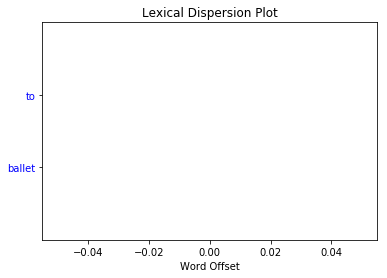

In [2180]:
nltk.draw.dispersion_plot(rev_only_one_df["clean_all_review"][1000], ["to", "ballet"])

Source: <br>
Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.

In [2161]:
rev_only_one_df["tagged"] = rev_only_one_df["tokenized"].apply(nltk.pos_tag)

In [1990]:
t = Tree("S", rev_only_one_df.tagged[0][:10])

In [1991]:
t.draw()

KeyboardInterrupt: 

In [1970]:
rev_only_one_df.tagged[0]

[('i', 'NN'),
 ('had', 'VBD'),
 ('an', 'DT'),
 ('absolutely', 'RB'),
 ('amazing', 'JJ'),
 ('experience', 'NN'),
 ('in', 'IN'),
 ('victoria', 'JJ'),
 ('crutchfield', 'NN'),
 ("'s", 'POS'),
 ('gre', 'JJ'),
 ('class', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('i', 'JJ'),
 ("'m", 'VBP'),
 ('certain', 'JJ'),
 ('my', 'PRP$'),
 ('fellow', 'JJ'),
 ('classmates', 'NNS'),
 ('did', 'VBD'),
 ('as', 'RB'),
 ('well', 'RB'),
 ('.', '.'),
 ('i', 'VB'),
 ('just', 'RB'),
 ('finished', 'VBN'),
 ('my', 'PRP$'),
 ('last', 'JJ'),
 ('class', 'NN'),
 ('with', 'IN'),
 ('victoria', 'NNS'),
 ('and', 'CC'),
 ('feel', 'VB'),
 ('confident', 'JJ'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('ability', 'NN'),
 ('attack', 'VBP'),
 ('the', 'DT'),
 ('gre', 'NN'),
 ('.', '.'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('that', 'IN'),
 (',', ','),
 ('i', 'VB'),
 ('went', 'VBD'),
 ('from', 'IN'),
 ('dreading', 'VBG'),
 ('math', 'NN'),
 ('to', 'TO'),
 ('truly', 'RB'),
 ('enjoying', 'VBG'),
 ('it', 'PRP'),
 ('thanks', 'VBZ'),
 ('to', 'TO'),
 (

In [1890]:
len(df_biz_tri.name.tolist())

1855

In [1896]:
df_biz_tri2 = df_biz_tri[df_biz_tri.name!="Bambini After School"]

In [1873]:
df_biz_tri2.drop(["index"], axis=1, inplace=True)

In [1876]:
df_biz_tri2.name[354]

'Huntington Learning Center'

In [1879]:
df_biz_tri2.name[354] == rev_only_one_df.business_name[354]

True

In [1920]:
reviews_only_df.review.tolist()

["I had an absolutely amazing experience in Victoria Crutchfield's GRE class, and I'm certain my fellow classmates did as well. I just finished my last class with Victoria and feel confident in my ability attack the GRE. More than that, I went from dreading math to truly enjoying it thanks to her enthusiasm and tutelage.  Victoria has every quality of a truly great teacher you can possibly imagine and then some - she really cares about where you're at and how to get you to where you want to be in terms of the material, strategies, and score. I started the class a decade removed from GRE level math and now fully fully confident in my ability to learn any concept and apply the strategies we learned in class to the test. She is incredibly mindful of the class's level of comfort with the material as a whole and always checks in to make sure everyone is understanding explanations, concepts, and strategies.  Highly recommended for anyone at any level. Of comfort with the material.",
 'Elaine

In [1753]:
df_all_3.head()

,display_phone,id,is_closed,name,phone,price,rating,review_count,transactions,url,...,title_1,alias_2,title_2,alias_3,title_3,title_0_code,title_1_code,title_2_code,title_3_code,counts
0,(212) 721-7400,zv-tJy03CCqZA1OZ05gJCQ,False,Manhattan Prep,+12127217400,NaN,4.5,101,[],https://www.yelp.com/biz/manhattan-prep-new-yo...,...,Test Preparation,privatetutors,Private Tutors,NaN,NaN,1,1,1,0,3
1,(212) 888-5728,HX483Djwn-9NyB2umn4LVA,False,180 Degrees LSAT,+12128885728,NaN,5.0,47,[],https://www.yelp.com/biz/180-degrees-lsat-broo...,...,Test Preparation,NaN,NaN,NaN,NaN,1,1,0,0,2
2,(646) 434-1084,6z63xLs8i0a-R1FMrzL-zw,False,Bright Kids NYC,+16464341084,NaN,3.5,34,[],https://www.yelp.com/biz/bright-kids-nyc-new-y...,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1
4,(800) 925-7737,tiJtgi0vAQULwzVmJDankg,False,Veritas Prep,+18009257737,NaN,4.5,23,[],https://www.yelp.com/biz/veritas-prep-new-york...,...,Test Preparation,privatetutors,Private Tutors,NaN,NaN,1,1,1,0,3
5,(718) 353-9868,HTNDX9rR0ilEPIbEfTlZaQ,False,Premier Aptitude,+17183539868,NaN,5.0,13,[],https://www.yelp.com/biz/premier-aptitude-flus...,...,Tutoring Centers,NaN,NaN,NaN,NaN,1,1,0,0,2


In [462]:
!python -m spacy download en
import spacy


    100% |████████████████████████████████| 11.1MB 36.6MB/s a 0:00:011 | 2.5MB 29.6MB/s eta 0:00:01
  Running setup.py install for en-core-web-sm ... done
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/en_core_web_sm -->
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [463]:
nlp = spacy.load('en')

In [465]:
rev_only_one_df_spacy = rev_only_one_df[["business_name", "all_review","clean_all_review"]]

In [467]:
rev_only_one_df_spacy["spacy_doc"] = rev_only_one_df_spacy["clean_all_review"].apply(nlp)

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [468]:
rev_only_one_df_spacy

,business_name,all_review,clean_all_review,spacy_doc
0,Manhattan Prep,"[""I had an absolutely amazing experience in Vi...",i had an absolutely amazing experience in vict...,"(i, had, an, absolutely, amazing, experience, ..."
1,Blueprint LSAT Preparation,"[""I NEVER write reviews but this course is exc...",i never write reviews but this course is excel...,"(i, never, write, reviews, but, this, course, ..."
2,Med School Tutors,"[""I'd spent a few months trying to study for S...",id spent a few months trying to study for step...,"(i, d, spent, a, few, months, trying, to, stud..."
3,Advantage Testing of Westchester,"[""I have now had two of my kids at Advantage f...",i have now had two of my kids at advantage for...,"(i, have, now, had, two, of, my, kids, at, adv..."
4,Look What I Can Do Learning Center,['I am beyond happy I found learning what i ca...,i am beyond happy i found learning what i can ...,"(i, am, beyond, happy, i, found, learning, wha..."
5,Diki Discovery Center,"[""I love this daycare! I had tried a previous ...",i love this daycare i had tried a previous day...,"(i, love, this, daycare, i, had, tried, a, pre..."
6,Choice Parenting,"[""Holly helped my family in our search for a f...",holly helped my family in our search for a ful...,"(holly, helped, my, family, in, our, search, f..."
7,Butterfly Daycare Center,"[""Both of my sons have attended Butterfly Dayc...",both of my sons have attended butterfly daycar...,"(both, of, my, sons, have, attended, butterfly..."
8,St Elizabeth Child Care Center,['This school is amazing. My son has been enro...,this school is amazing my son has been enrolle...,"(this, school, is, amazing, my, son, has, been..."
9,Doula Support NYC,"[""Stephanie is a wonderful pregnancy support. ...",stephanie is a wonderful pregnancy support i s...,"(stephanie, is, a, wonderful, pregnancy, suppo..."


In [469]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [481]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['would'])
def remove_stop_words(lst):
    new_lst = []
    for word in lst:
        if word not in stop_words:
            new_lst.append(word)
    return new_lst

In [482]:
len(stop_words)

180

In [503]:
data = rev_only_one_df.all_review.values.tolist()

In [504]:
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [505]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [506]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['had', 'an', 'absolutely', 'amazing', 'experience', 'in', 'victoria', 'crutchfields', 'gre', 'class', 'and', 'im', 'certain', 'my', 'fellow_classmates', 'did', 'as', 'well', 'just', 'finished', 'my', 'last', 'class', 'with', 'victoria', 'and', 'feel', 'confident', 'in', 'my', 'ability', 'attack', 'the', 'gre', 'more', 'than', 'that', 'went', 'from', 'dreading', 'math', 'to', 'truly', 'enjoying', 'it', 'thanks', 'to', 'her', 'enthusiasm', 'and', 'tutelage', 'victoria', 'has', 'every', 'quality', 'of', 'truly', 'great', 'teacher', 'you', 'can', 'possibly', 'imagine', 'and', 'then', 'some', 'she', 'really', 'cares', 'about', 'where', 'youre', 'at', 'and', 'how', 'to', 'get', 'you', 'to', 'where', 'you', 'want', 'to', 'be', 'in', 'terms', 'of', 'the', 'material', 'strategies', 'and', 'score', 'started', 'the', 'class', 'decade', 'removed', 'from', 'gre', 'level', 'math', 'and', 'now', 'fully', 'fully', 'confident', 'in', 'my', 'ability', 'to', 'learn', 'any', 'concept', 'and', 'apply', 't

In [507]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [508]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [509]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [510]:
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [512]:
pprint(lda_model2.print_topics())
doc_lda = lda_model2[corpus]

[(0,
  '0.070*"kid" + 0.046*"place" + 0.032*"party" + 0.032*"play" + 0.029*"fun" + '
  '0.020*"paint" + 0.020*"great" + 0.019*"art" + 0.017*"area" + 0.016*"love"'),
 (1,
  '0.000*"enthuse" + 0.000*"eoy" + 0.000*"defeating" + 0.000*"dice" + '
  '0.000*"edna" + 0.000*"cwsl" + 0.000*"exigency" + 0.000*"examsoft" + '
  '0.000*"cursed" + 0.000*"equitable"'),
 (2,
  '0.028*"ivy" + 0.008*"erfun" + 0.000*"shsat" + 0.000*"sat" + '
  '0.000*"superstar" + 0.000*"rationale" + 0.000*"jae" + 0.000*"assessing" + '
  '0.000*"shocked" + 0.000*"specialized_high"'),
 (3,
  '0.110*"improv" + 0.007*"carl" + 0.000*"comedy" + 0.000*"magnet_theater" + '
  '0.000*"ucb" + 0.000*"musical_improv" + 0.000*"intro" + 0.000*"beer" + '
  '0.000*"accent" + 0.000*"sketch"'),
 (4,
  '0.009*"sticker" + 0.003*"determined" + 0.000*"edward" + 0.000*"shsat" + '
  '0.000*"piano" + 0.000*"stratus" + 0.000*"stratus_prep" + 0.000*"brainiac" + '
  '0.000*"taba" + 0.000*"dissatisfied"'),
 (5,
  '0.000*"enthuse" + 0.000*"eoy" + 0.00

Topic 0 is a represented as _0.016“car” + 0.014“power” + 0.010“light” + 0.009“drive” + 0.007“mount” + 0.007“controller” + 0.007“cool” + 0.007“engine” + 0.007“back” + ‘0.006“turn”.

It means the top 10 keywords that contribute to this topic are: ‘car’, ‘power’, ‘light’.. and so on and the weight of ‘car’ on topic 0 is 0.016.

The weights reflect how important a keyword is to that topic.

Looking at these keywords, can you guess what this topic could be? You may summarise it either are ‘cars’ or ‘automobiles’.

Neural Network long-short term memory

In [513]:
print('\nPerplexity: ', lda_model2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.978748214731565

Coherence Score:  0.4799639096587881


In [516]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model2, corpus, id2word)
vis

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


TypeError: Object of type 'complex' is not JSON serializable

PreparedData(topic_coordinates=                               x                           y  topics  cluster  \
topic                                                                           
14      (0.29038099501681003+0j)   (-0.04691487684002549+0j)       1        1   
9       (0.32176334557625086+0j)   (-0.05312227901664959+0j)       2        1   
18       (0.3036794897504017+0j)    (0.04817879100463232+0j)       3        1   
16      (0.29385778355459996+0j)   (-0.00345975040202422+0j)       4        1   
15       (0.2059542609078644+0j)    (-0.1438274580311237+0j)       5        1   
7       (0.25675353354557345+0j)    (0.23842979889048774+0j)       6        1   
17      (0.16060728526353976+0j)   (-0.20238751642571431+0j)       7        1   
10      (0.24694766820542385+0j)    (0.08843913165154381+0j)       8        1   
0       (0.12339841419305998+0j)   (-0.25572302366176014+0j)       9        1   
11        (0.162829227177345+0j)    (0.26517727556960413+0j)      10        1 

In [483]:
rev_only_one_df["no_stop"] = rev_only_one_df.tokenized.apply(remove_stop_words)

In [494]:
rev_only_one_df["preprocessed"] = rev_only_one_df.clean_all_review.apply(lambda x: gensim.utils.simple_preprocess(str(x), deacc=True))

In [499]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.

NameError: name 'data_words' is not defined

In [502]:
rev_only_one_df["bigrams"] = rev_only_one_df.clean_all_review.apply(lambda x: gensim.models.phrases.Phraser((x, 5, 100)))

AttributeError: 'tuple' object has no attribute 'threshold'

In [495]:
rev_only_one_df

,business_name,all_review,clean_all_review,tokenized,no_stop,bigrams,corpus,cleaned_nostop_text,sentiment,preprocessed
0,Manhattan Prep,"[""I had an absolutely amazing experience in Vi...",i had an absolutely amazing experience in vict...,"[i, had, an, absolutely, amazing, experience, ...","[absolutely, amazing, experience, victoria, cr...","[absolutely_amazing, experience, victoria, cru...","[(0, 1), (1, 9), (2, 4), (3, 1), (4, 1), (5, 1...",absolutely amazing experience victoria crutchf...,1.049617,"[had, an, absolutely, amazing, experience, in,..."
1,Blueprint LSAT Preparation,"[""I NEVER write reviews but this course is exc...",i never write reviews but this course is excel...,"[i, never, write, reviews, but, this, course, ...","[never, write, reviews, course, excellent, das...","[never, write_reviews, course, excellent, dask...","[(1, 2), (10, 2), (11, 4), (12, 1), (22, 3), (...",never write reviews course excellent dask k ph...,1.216035,"[never, write, reviews, but, this, course, is,..."
2,Med School Tutors,"[""I'd spent a few months trying to study for S...",id spent a few months trying to study for step...,"[id, spent, a, few, months, trying, to, study,...","[id, spent, months, trying, study, step, 1, nb...","[id, spent, months, trying, study, step_1, nbm...","[(6, 2), (10, 5), (29, 1), (41, 3), (102, 1), ...",id spent months trying study step 1 nbme score...,1.289382,"[id, spent, few, months, trying, to, study, fo..."
3,Advantage Testing of Westchester,"[""I have now had two of my kids at Advantage f...",i have now had two of my kids at advantage for...,"[i, have, now, had, two, of, my, kids, at, adv...","[two, kids, advantage, sat/act, prep, first, o...","[two, kids, advantage, sat/act_prep, first, on...","[(148, 1), (152, 1), (184, 1), (204, 1), (222,...",two kids advantage sat/act prep first one alre...,0.439160,"[have, now, had, two, of, my, kids, at, advant..."
4,Look What I Can Do Learning Center,['I am beyond happy I found learning what i ca...,i am beyond happy i found learning what i can ...,"[i, am, beyond, happy, i, found, learning, wha...","[beyond, happy, found, learning, learning, cen...","[beyond, happy_found, learning, learning_cente...","[(6, 1), (12, 1), (29, 1), (41, 1), (63, 3), (...",beyond happy found learning learning center ma...,1.308154,"[am, beyond, happy, found, learning, what, can..."
5,Diki Discovery Center,"[""I love this daycare! I had tried a previous ...",i love this daycare i had tried a previous day...,"[i, love, this, daycare, i, had, tried, a, pre...","[love, daycare, tried, previous, daycare, son,...","[love, daycare, tried, previous_daycare, son, ...","[(10, 1), (41, 1), (63, 1), (64, 2), (77, 1), ...",love daycare tried previous daycare son disple...,1.200489,"[love, this, daycare, had, tried, previous, da..."
6,Choice Parenting,"[""Holly helped my family in our search for a f...",holly helped my family in our search for a ful...,"[holly, helped, my, family, in, our, search, f...","[holly, helped, family, search, fulltime, nann...","[holly, helped, family, search, fulltime, nann...","[(10, 1), (41, 1), (142, 1), (144, 1), (147, 1...",holly helped family search fulltime nanny infa...,1.294217,"[holly, helped, my, family, in, our, search, f..."
7,Butterfly Daycare Center,"[""Both of my sons have attended Butterfly Dayc...",both of my sons have attended butterfly daycar...,"[both, of, my, sons, have, attended, butterfly...","[sons, attended, butterfly, daycare, 2, 5, yea...","[sons, attended, butterfly, daycare, 2, 5_year...","[(10, 1), (41, 1), (49, 1), (57, 1), (102, 1),...",sons attended butterfly daycare 2 5 years old ...,1.104781,"[both, of, my, sons, have, attended, butterfly..."
8,St Elizabeth Child Care Center,['This school is amazing. My son has been enro...,this school is amazing my son has been enrolle...,"[this, school, is, amazing, my, son, has, been...","[school, amazing, son, enrolled, going, two, y...","[school, amazing, son, enrolled, going, two_ye...","[(8, 1), (